In [2]:
import bs4
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url="https://www.airlinequality.com/airline-reviews/british-airways"
response=requests.get(url)
response.status_code

200

In [4]:
soup=BeautifulSoup(response.text,'html5lib')
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <title>
   British Airways Customer Reviews - SKYTRAX
  </title>
  <!-- Google Chrome Frame for IE -->
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <!-- mobile meta -->
  <meta content="True" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <!-- icons & favicons -->
  <link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-i

## Scraping all pages

In [5]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages=300
reviews=[]
for i in range(1,pages+1):
    url=base_url+"/page/"+str(i)
    response = requests.get(url)
    data=response.text
    soup=BeautifulSoup(data,'html5lib')
    h2_elements = soup.find_all('h2', class_="text_header")
    h2_texts = [h2.text for h2 in h2_elements]
    reviews.extend(h2_texts)


In [6]:
reviews

['“Lots of stress”',
 '"did not offer a wheelchair"',
 '“Seat was fine but product ageing”',
 '"such a terrible customer experience" ',
 '"I was pleasantly surprised"',
 '"Buckle up, folks; this one\'s a rollercoaster"',
 '"cabin crew excellent"',
 '"Service level far worse then Ryanair"',
 '"do not upgrade members based on status"',
 '"Flight was smooth and quick"',
 '"Absolutely hopeless airline"',
 '"Customer Service is non existent"',
 '"I can’t imagine a worst airline"',
 '"sufficient leg and arm room"',
 '“crew were polite”',
 '"Angry, disappointed, and unsatisfied"',
 '"BA now stands for Basic Airways"',
 '"A totally unremarkable flight"',
 '“BA clearly does not care”',
 '"reflect a downward trend of the airline"',
 '"One of my better flights"',
 '"I would still recommend BA" ',
 '"the worst experience ever"',
 '"an exceptional crew member" ',
 '"even Ryanair have more space"',
 '"in-flight service is usually weak"',
 '"BA customer service is a disgrace"',
 '"little concern for 

In [7]:
Set_={'Customer Review':reviews}
BA_reviews=pd.DataFrame(Set_)
BA_reviews

,Customer Review
0,“Lots of stress”
1,"""did not offer a wheelchair"""
2,“Seat was fine but product ageing”
3,"""such a terrible customer experience"""
4,"""I was pleasantly surprised"""
...,...
2995,British Airways customer review
2996,British Airways customer review
2997,British Airways customer review
2998,British Airways customer review


In [8]:
BA_reviews["Customer Review"].value_counts()

Customer Review
British Airways customer review      248
"never fly British Airways again"      6
"Overall a good flight"                5
"I was pleasantly surprised"           4
"BA has gone downhill"                 3
                                    ... 
"Not good for business"                1
"behind the competition"               1
"staff exceptionally friendly"         1
"personal space is so tight"           1
"cannot fault the service"             1
Name: count, Length: 2689, dtype: int64

In [9]:
value_to_del= 'British Airways customer review'
df = BA_reviews[BA_reviews['Customer Review'] != value_to_del]
df

,Customer Review
0,“Lots of stress”
1,"""did not offer a wheelchair"""
2,“Seat was fine but product ageing”
3,"""such a terrible customer experience"""
4,"""I was pleasantly surprised"""
...,...
2760,"""need to up their game"""
2761,"""our last flight with British Airways"""
2762,"""supposed legacy airline"""
2763,"""staff amiable and present"""


# NLP

In [10]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['Customer Review'].apply(clean)
df

C:\Users\varun\AppData\Local\Temp\ipykernel_26844\2042354607.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned Reviews'] = df['Customer Review'].apply(clean)


,Customer Review,Cleaned Reviews
0,“Lots of stress”,Lots of stress
1,"""did not offer a wheelchair""",did not offer a wheelchair
2,“Seat was fine but product ageing”,Seat was fine but product ageing
3,"""such a terrible customer experience""",such a terrible customer experience
4,"""I was pleasantly surprised""",I was pleasantly surprised
...,...,...
2760,"""need to up their game""",need to up their game
2761,"""our last flight with British Airways""",our last flight with British Airways
2762,"""supposed legacy airline""",supposed legacy airline
2763,"""staff amiable and present""",staff amiable and present


In [11]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading stopwords: Remote end closed connection
[nltk_data]     without response
[nltk_data] Error loading wordnet: Remote end closed connection
[nltk_data]     without response


In [12]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10054] An existing connection was forcibly
[nltk_data]     closed by the remote host>
C:\Users\varun\AppData\Local\Temp\ipykernel_26844\3663659467.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)


,Customer Review,Cleaned Reviews,POS tagged
0,“Lots of stress”,Lots of stress,"[(Lots, n), (stress, n)]"
1,"""did not offer a wheelchair""",did not offer a wheelchair,"[(offer, v), (wheelchair, n)]"
2,“Seat was fine but product ageing”,Seat was fine but product ageing,"[(Seat, n), (fine, a), (product, n), (ageing, n)]"
3,"""such a terrible customer experience""",such a terrible customer experience,"[(terrible, a), (customer, n), (experience, n)]"
4,"""I was pleasantly surprised""",I was pleasantly surprised,"[(pleasantly, r), (surprised, a)]"


In [13]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

C:\Users\varun\AppData\Local\Temp\ipykernel_26844\2767537322.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemma'] = df['POS tagged'].apply(lemmatize)


,Customer Review,Cleaned Reviews,POS tagged,Lemma
0,“Lots of stress”,Lots of stress,"[(Lots, n), (stress, n)]",Lots stress
1,"""did not offer a wheelchair""",did not offer a wheelchair,"[(offer, v), (wheelchair, n)]",offer wheelchair
2,“Seat was fine but product ageing”,Seat was fine but product ageing,"[(Seat, n), (fine, a), (product, n), (ageing, n)]",Seat fine product ageing
3,"""such a terrible customer experience""",such a terrible customer experience,"[(terrible, a), (customer, n), (experience, n)]",terrible customer experience
4,"""I was pleasantly surprised""",I was pleasantly surprised,"[(pleasantly, r), (surprised, a)]",pleasantly surprised


## Analyze the Sentiment

In [14]:
!pip install vaderSentiment

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df

C:\Users\varun\AppData\Local\Temp\ipykernel_26844\123343064.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)
C:\Users\varun\AppData\Local\Temp\ipykernel_26844\123343064.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analysis'] = df['Sentiment'].apply(vader_analysis)


,Customer Review,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,“Lots of stress”,Lots of stress,"[(Lots, n), (stress, n)]",Lots stress,-0.4215,Negative
1,"""did not offer a wheelchair""",did not offer a wheelchair,"[(offer, v), (wheelchair, n)]",offer wheelchair,0.0000,Neutral
2,“Seat was fine but product ageing”,Seat was fine but product ageing,"[(Seat, n), (fine, a), (product, n), (ageing, n)]",Seat fine product ageing,0.2023,Neutral
3,"""such a terrible customer experience""",such a terrible customer experience,"[(terrible, a), (customer, n), (experience, n)]",terrible customer experience,-0.4767,Negative
4,"""I was pleasantly surprised""",I was pleasantly surprised,"[(pleasantly, r), (surprised, a)]",pleasantly surprised,0.6124,Positive
...,...,...,...,...,...,...
2760,"""need to up their game""",need to up their game,"[(need, n), (game, n)]",need game,0.0000,Neutral
2761,"""our last flight with British Airways""",our last flight with British Airways,"[(last, a), (flight, n), (British, a), (Airway...",last flight British Airways,0.0000,Neutral
2762,"""supposed legacy airline""",supposed legacy airline,"[(supposed, v), (legacy, n), (airline, n)]",suppose legacy airline,0.0000,Neutral
2763,"""staff amiable and present""",staff amiable and present,"[(staff, n), (amiable, a), (present, a)]",staff amiable present,0.0000,Neutral


In [16]:
df["Analysis"].value_counts()

Analysis
Neutral     1579
Negative     802
Positive     371
Name: count, dtype: int64

<Axes: xlabel='Analysis', ylabel='count'>

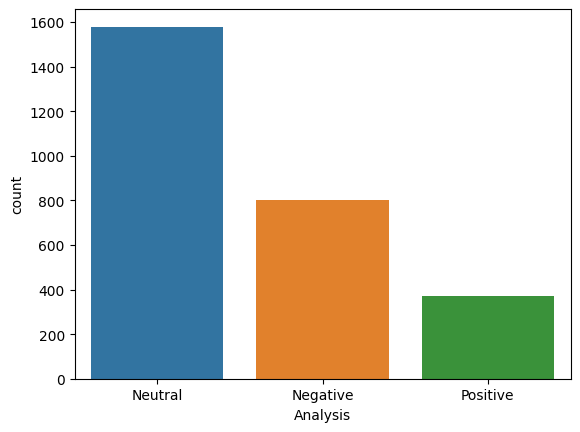

In [39]:
import seaborn as sns
sns.barplot(x=df["Analysis"].value_counts().index, y=df["Analysis"].value_counts())